# ANALYSIS OF MODEL RESULTS (K=5, FILTERED)

Here, the input data of this code is .csv file derived from the results of the model converted to vector (downloaded from the GEE code "4_model_final"). Feel free to tailor it with your different model experiments from your area of interest. 

In [1]:
import pandas as pd

# Specify the path to the CSV file
file_path = 'Clustered_Features_refined.csv'# updated accordingly

# Read the CSV file
data = pd.read_csv(file_path)

# Display an overview of the data
print("Shape of the data:", data.shape)
print("Columns:", data.columns)
print("First 5 rows:")
print(data.head())

Shape of the data: (262853, 24)
Columns: Index(['system:index', '0_DEM', '10_PopCount', '11_Slope', '12_VIIRS',
       '13_DistGreenAreas', '14_glcmContrast', '15_glcmDissimilarity',
       '16_glcmEntropy', '17_glcmHomogeneity', '18_glcmVariance',
       '19_MSISmooth', '1_DeadEndsDensity', '20_S2Band5', '2_DistEducation',
       '3_DistFinance', '4_DistHealth', '5_DistMajorRoads', '6_DistPoorRoads',
       '7_DistWaterBodies', '8_DistWetlands', '9_NDVI', 'cluster', '.geo'],
      dtype='object')
First 5 rows:
   system:index      0_DEM  10_PopCount   11_Slope  12_VIIRS  \
0             0  80.534760     1.128787  12.557241  4.144772   
1             1  80.534760     1.128787  12.557251  4.144772   
2             2  80.748665     1.128787  14.509990  4.144772   
3             3  80.427810     1.128787  27.576168  4.144772   
4             4  80.320854     1.128787  27.890463  4.144772   

   13_DistGreenAreas  14_glcmContrast  15_glcmDissimilarity  16_glcmEntropy  \
0          19.00192

In [2]:
# Check for missing values
missing_values = data.isnull().sum()

# Filter and display columns with missing values
columns_with_missing = missing_values[missing_values > 0]

if columns_with_missing.empty:
    print("No missing values detected in the dataset.")
else:
    print("Missing values detected:")
    print(columns_with_missing)


No missing values detected in the dataset.


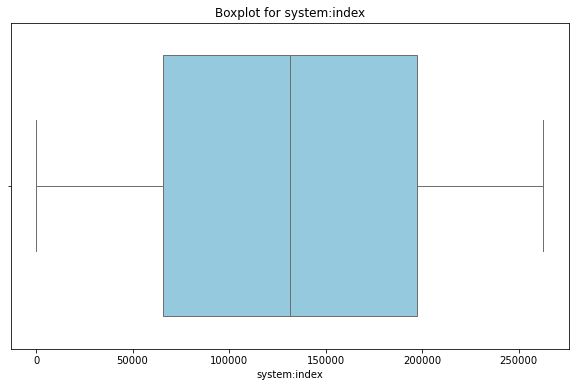

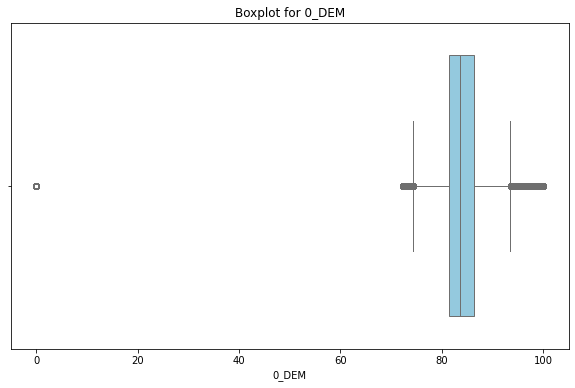

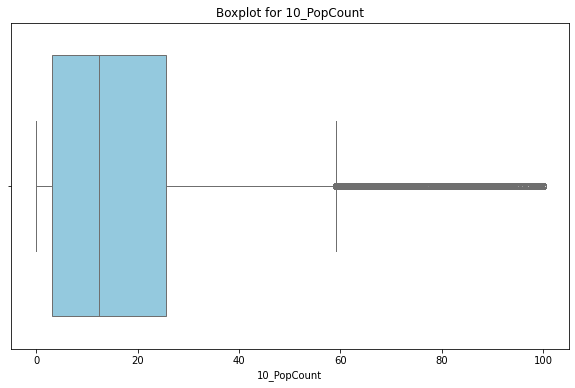

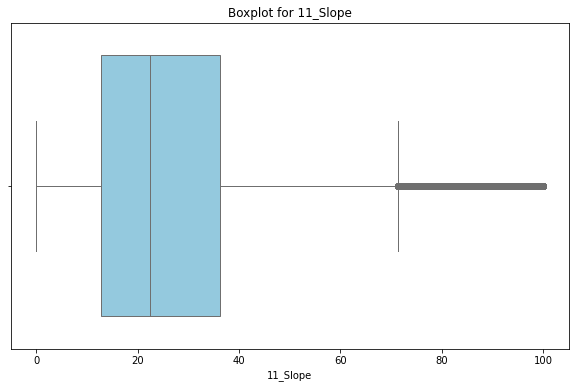

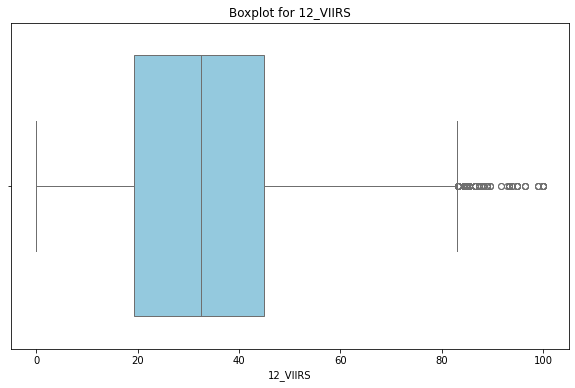

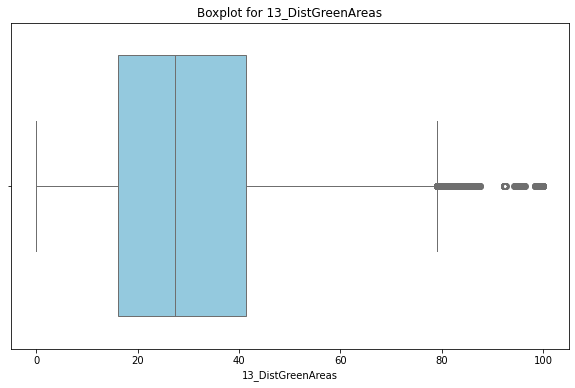

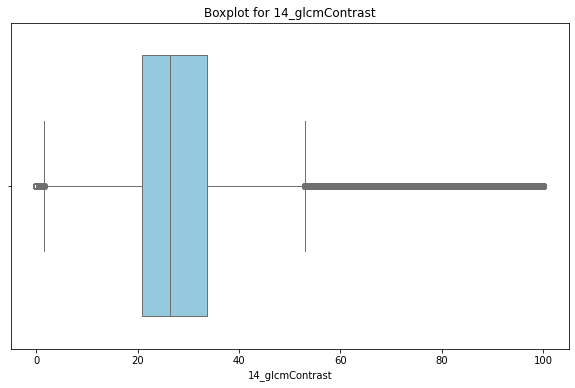

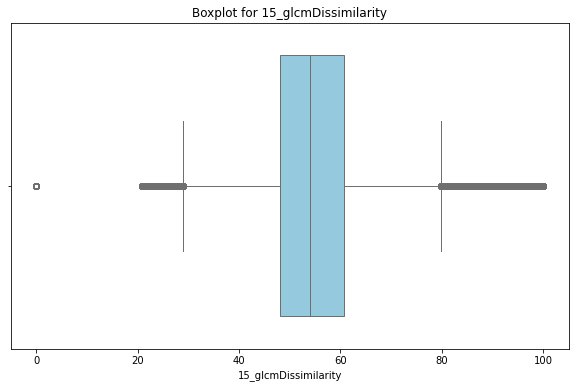

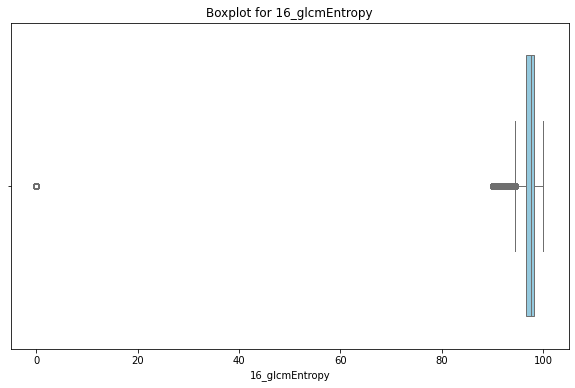

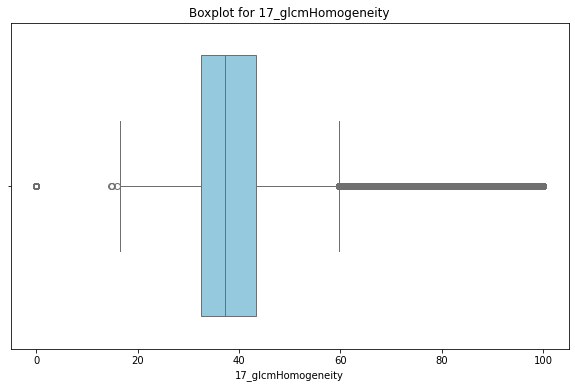

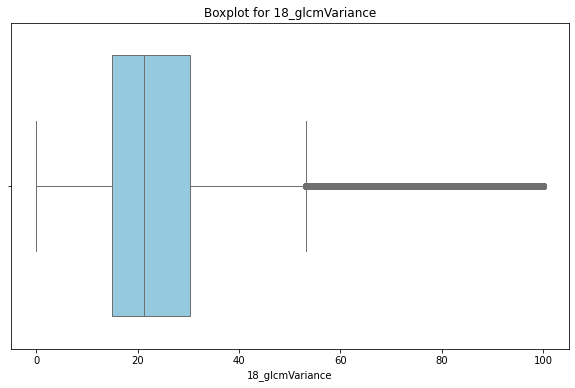

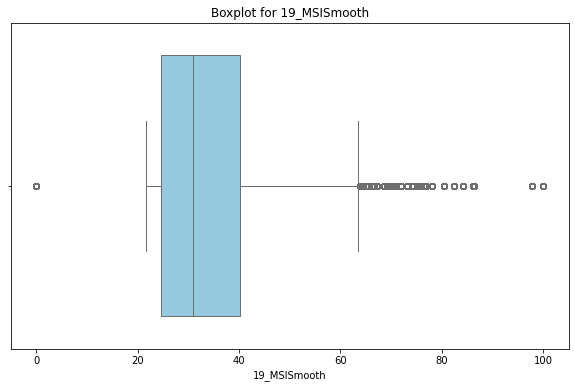

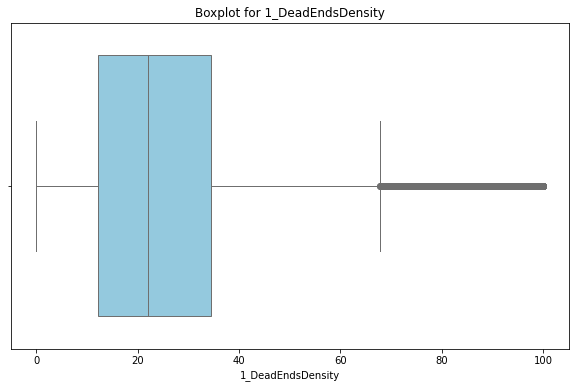

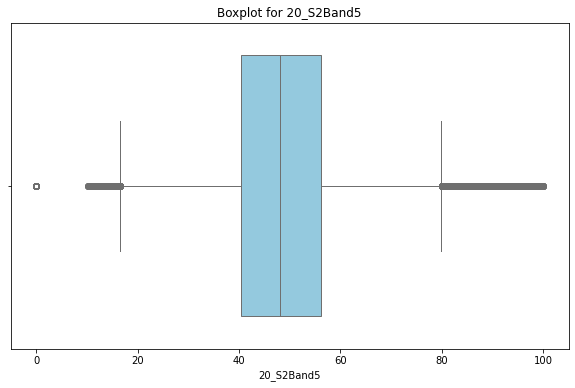

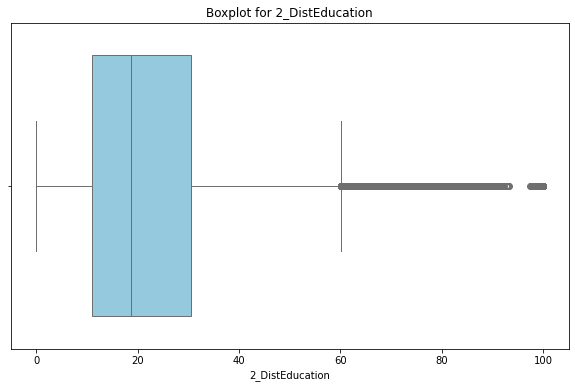

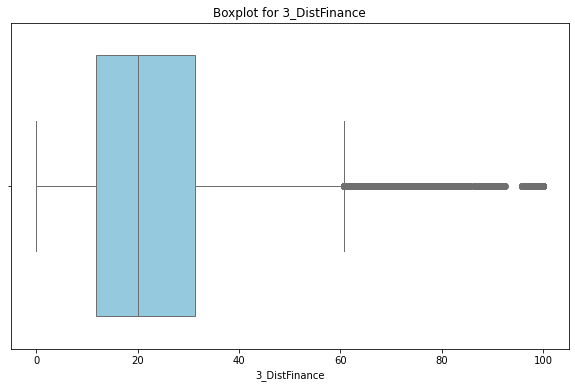

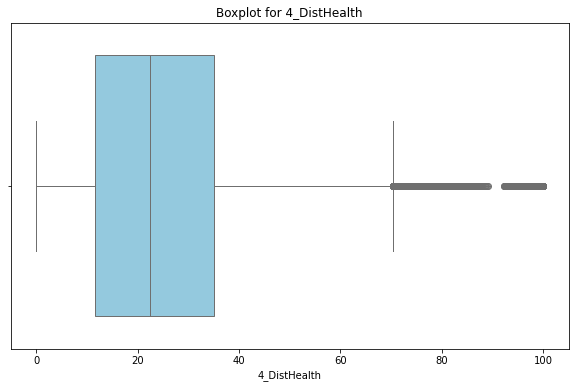

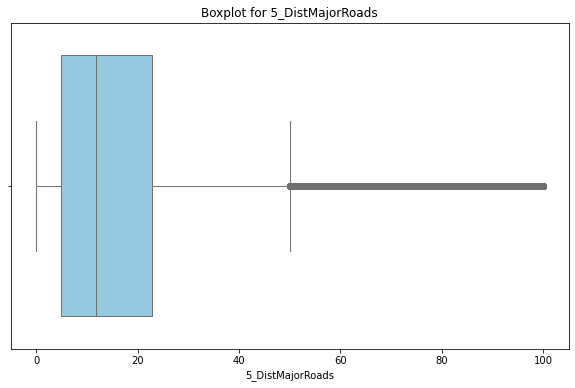

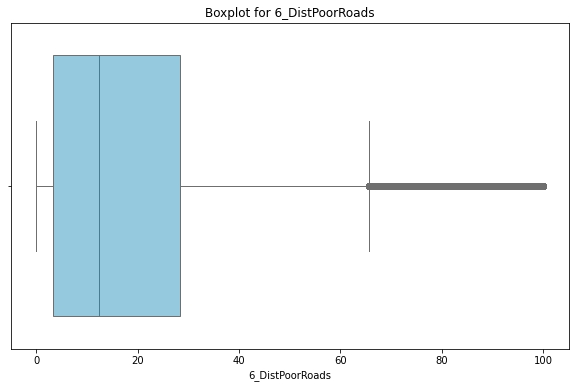

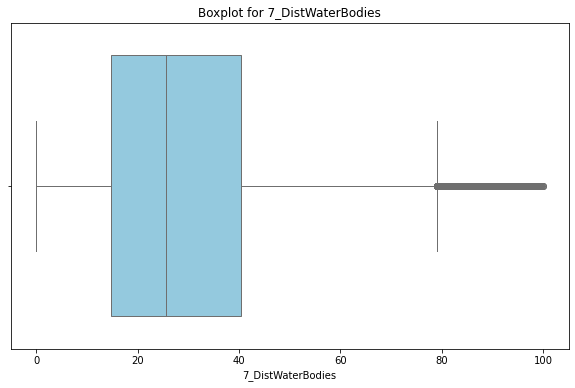

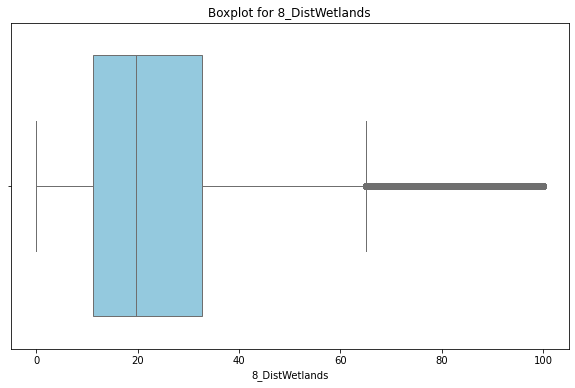

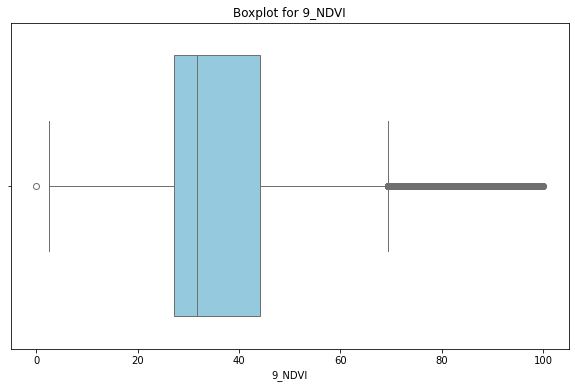

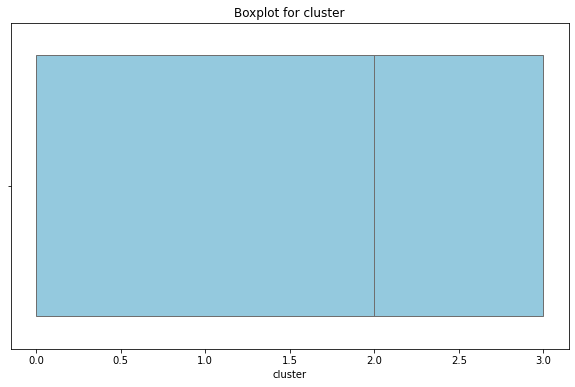

In [3]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[column], orient='h', color='skyblue')
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.show()


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


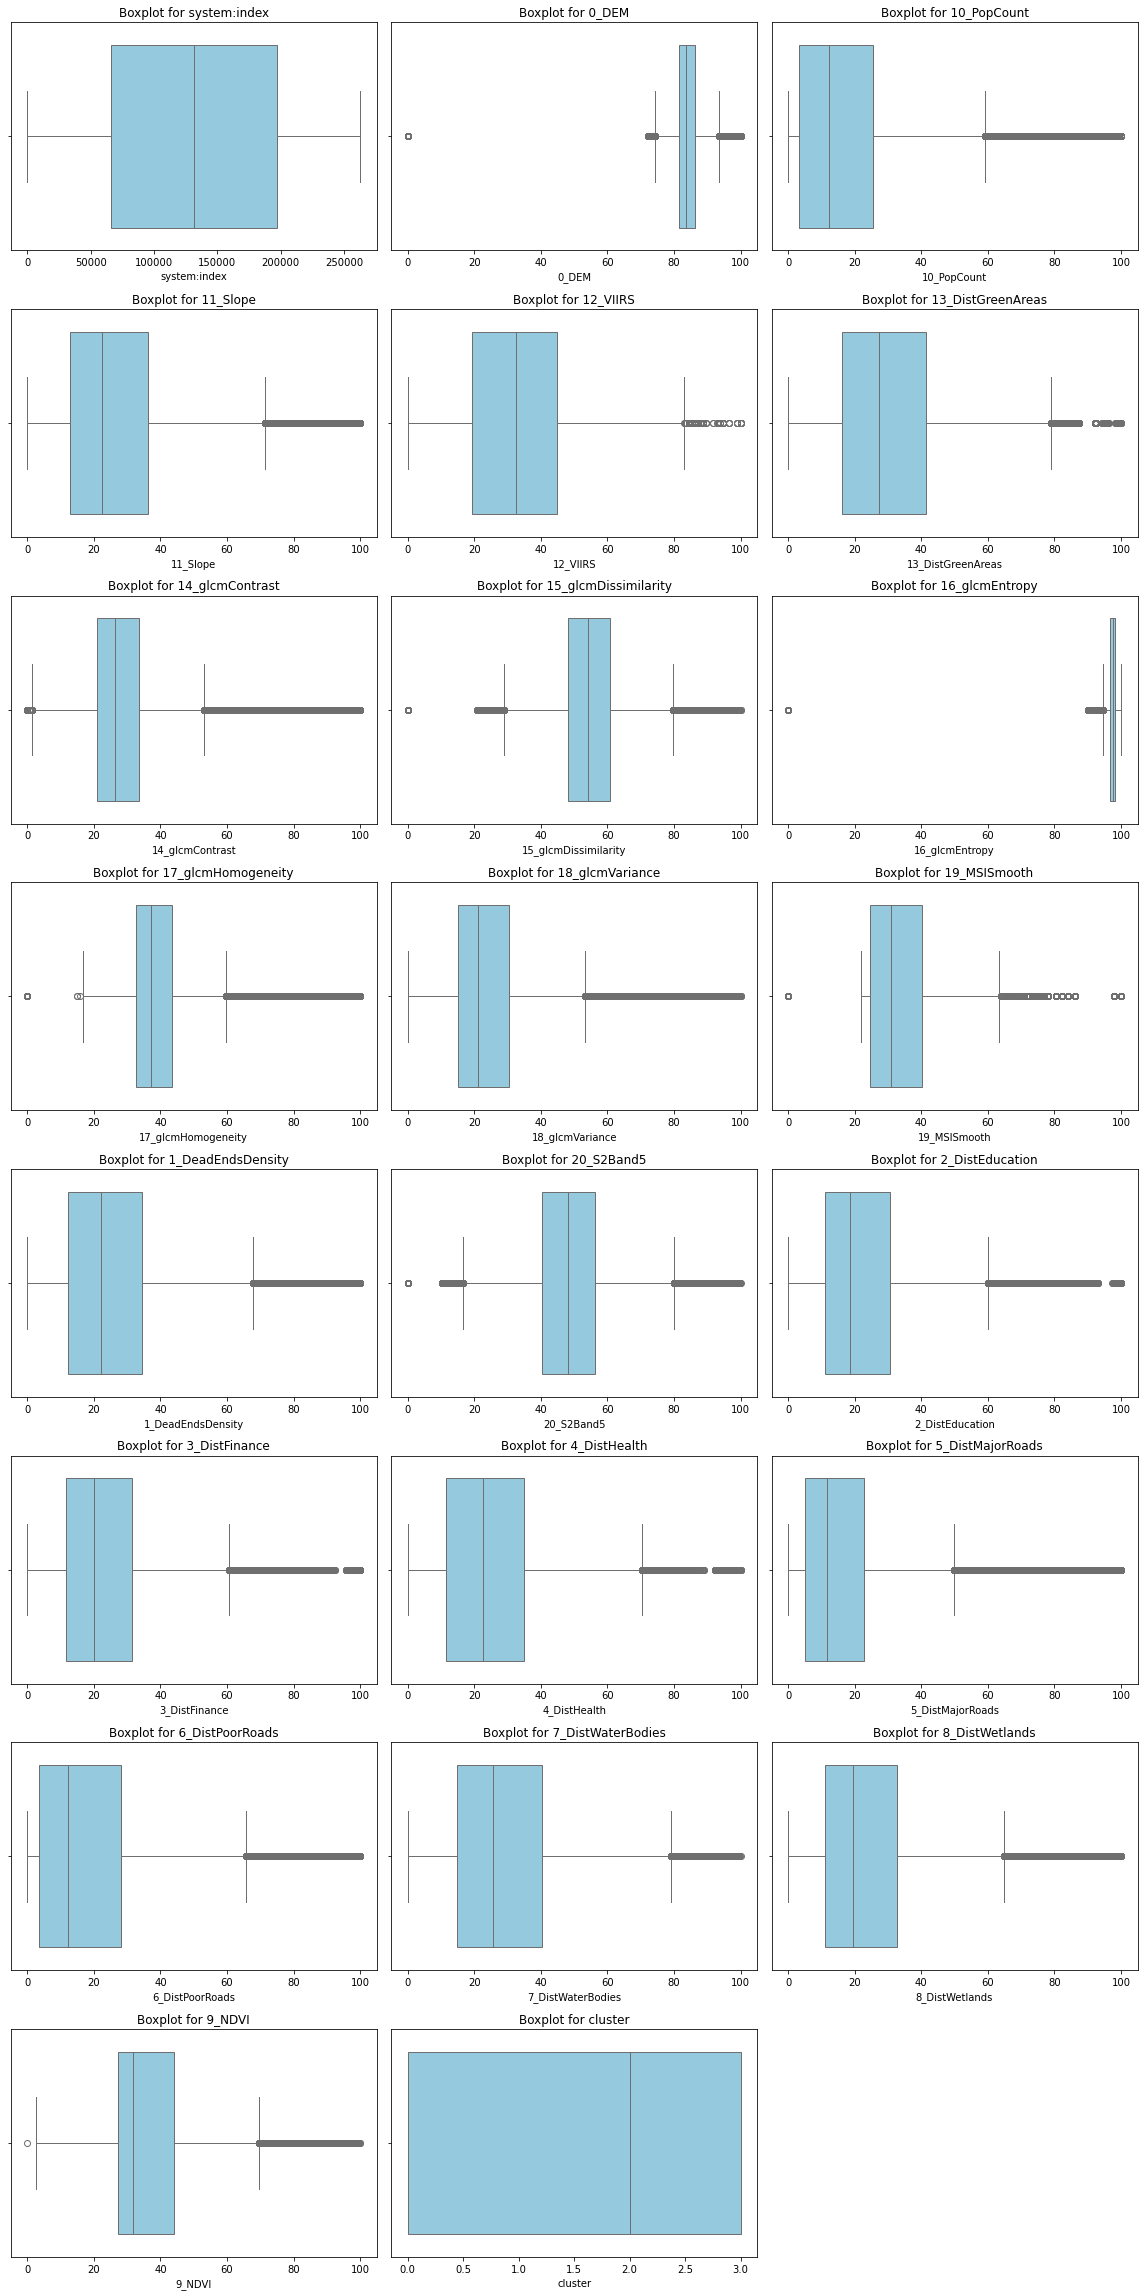

In [4]:
# OUTLIER DETECTION

# if necessary:
!pip install math
!pip install seaborn

# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns for analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the grid layout for the boxplots
num_cols = 3  # Number of boxplots per row
num_rows = math.ceil(len(numeric_columns) / num_cols)  # Calculate required rows

# Create the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i], color='skyblue', orient='h')
    axes[i].set_title(f"Boxplot for {column}")
    axes[i].set_xlabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("boxplots_grid_4k.png", dpi=300)
plt.show()


In [3]:
# derive descriptive statistics
print(data.describe())

        system:index          0_DEM    10_PopCount       11_Slope  \
count  262853.000000  262853.000000  262853.000000  262853.000000   
mean   131426.000000      83.824999      17.442489      26.410737   
std     75879.269491       6.059589      17.857076      18.084345   
min         0.000000       0.000000       0.000000       0.000000   
25%     65713.000000      81.497330       3.182532      12.726969   
50%    131426.000000      83.636360      12.422358      22.399010   
75%    197139.000000      86.310160      25.548400      36.186670   
max    262852.000000     100.000000     100.000000     100.000000   

            12_VIIRS  13_DistGreenAreas  14_glcmContrast  \
count  262853.000000      262853.000000    262853.000000   
mean       33.214128          29.737622        28.590373   
std        16.550355          17.532100        12.289108   
min         0.000000           0.000000         0.000000   
25%        19.387570          16.178585        20.799393   
50%        32.4741

In [4]:
# how many points in each cluster?
cluster_counts = data['cluster'].value_counts()
print(cluster_counts)


0    81819
1    75838
2    43212
3    36329
4    25655
Name: cluster, dtype: int64


In [5]:
# Pearson Correlation Matrix
correlation_matrix = data.iloc[:, 1:22].corr()  # Exclude metadata and cluster columns
print(correlation_matrix)


                         0_DEM  10_PopCount  11_Slope  12_VIIRS  \
0_DEM                 1.000000    -0.010037  0.190960 -0.024690   
10_PopCount          -0.010037     1.000000 -0.044916  0.472399   
11_Slope              0.190960    -0.044916  1.000000 -0.149069   
12_VIIRS             -0.024690     0.472399 -0.149069  1.000000   
13_DistGreenAreas     0.073093    -0.183100  0.061016 -0.192431   
14_glcmContrast      -0.009936    -0.091431 -0.036872  0.019383   
15_glcmDissimilarity  0.008843    -0.054736 -0.037406  0.068801   
16_glcmEntropy        0.031154     0.098411 -0.040928  0.159468   
17_glcmHomogeneity   -0.008813    -0.156963  0.055742 -0.254164   
18_glcmVariance       0.010235    -0.278625  0.017008 -0.194953   
19_MSISmooth         -0.012804     0.165873 -0.018050  0.175448   
1_DeadEndsDensity     0.013955     0.087695  0.007929  0.172354   
20_S2Band5           -0.072896    -0.073899 -0.073380 -0.046793   
2_DistEducation       0.052153    -0.224149  0.104987 -0.33948

In [8]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

     -------------------------------------- 294.9/294.9 KB 6.1 MB/s eta 0:00:00


C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


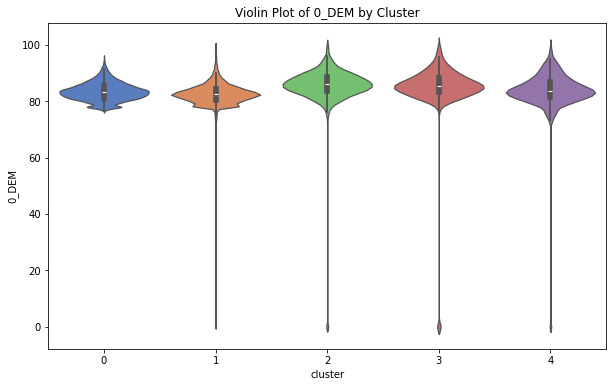

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


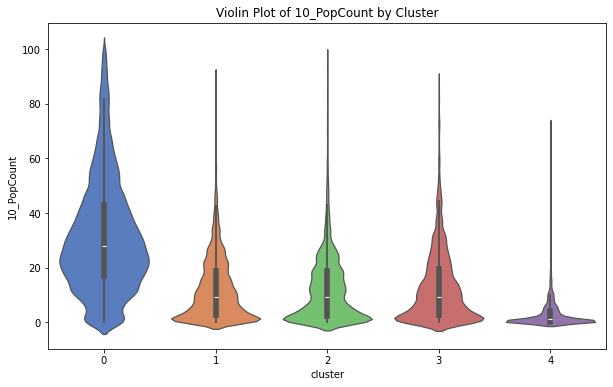

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


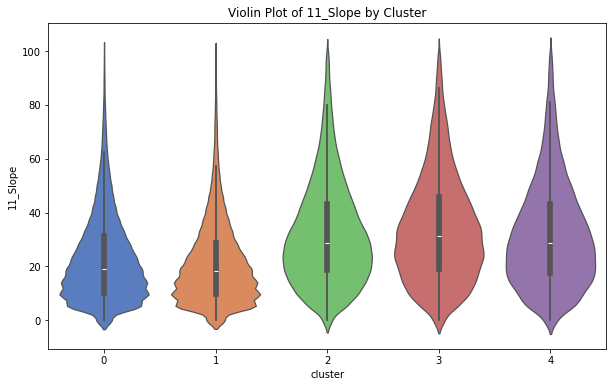

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


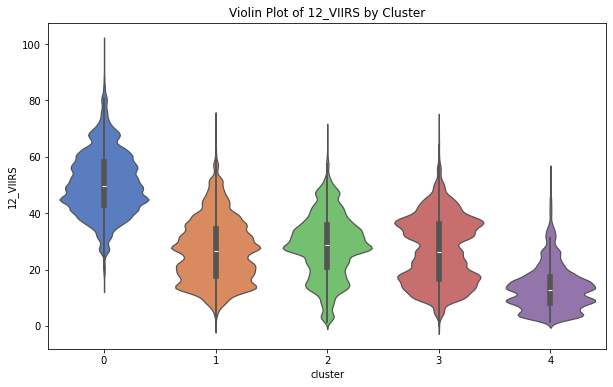

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


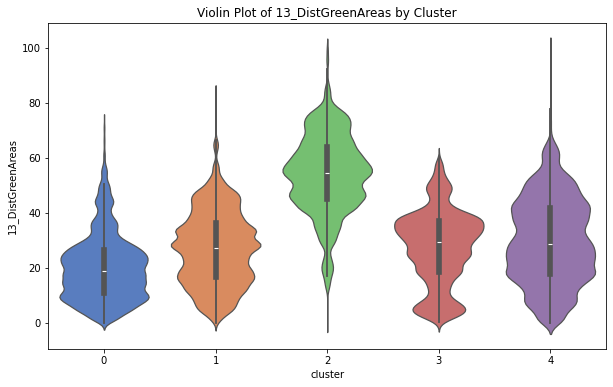

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


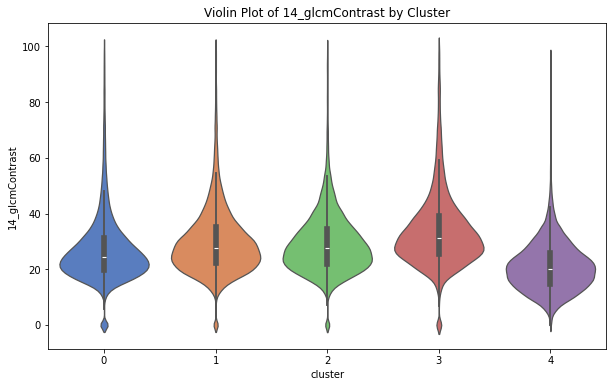

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


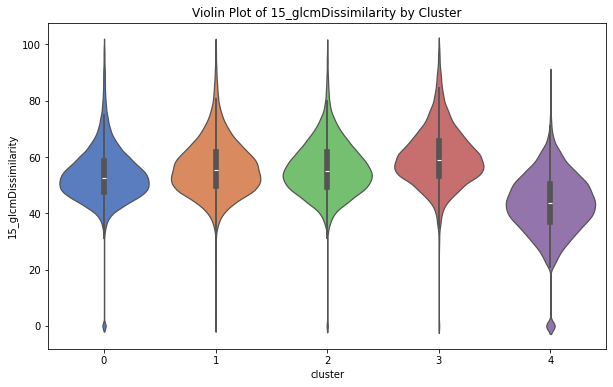

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


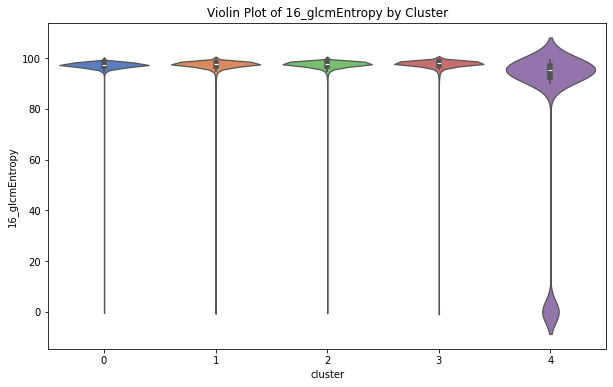

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


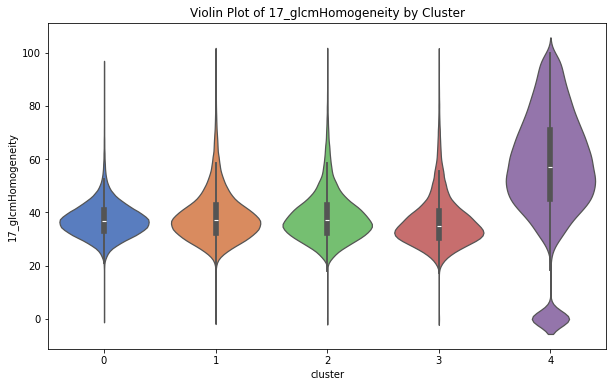

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


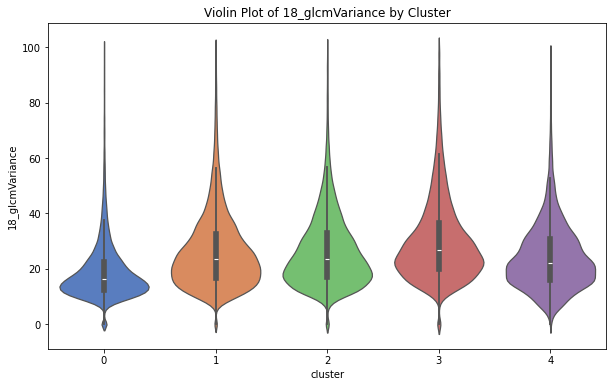

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


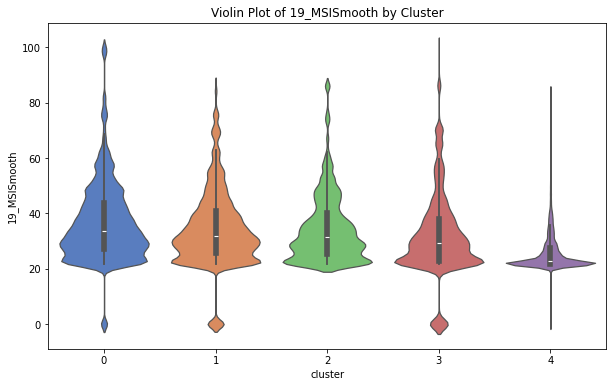

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


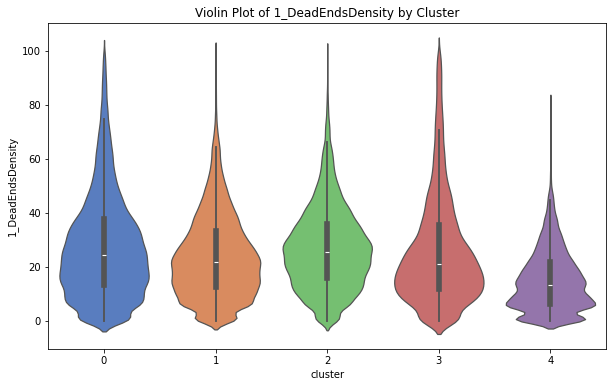

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


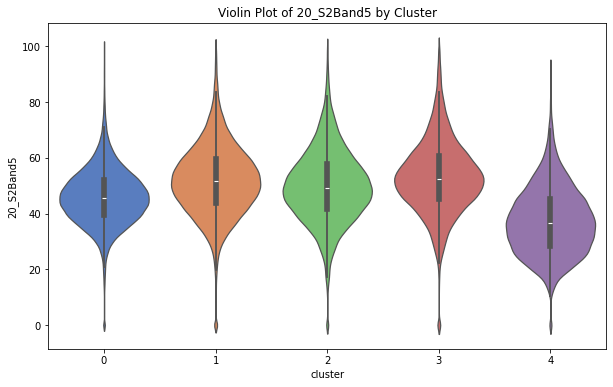

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


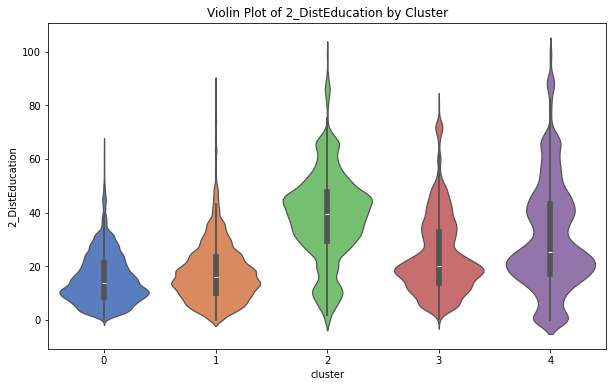

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


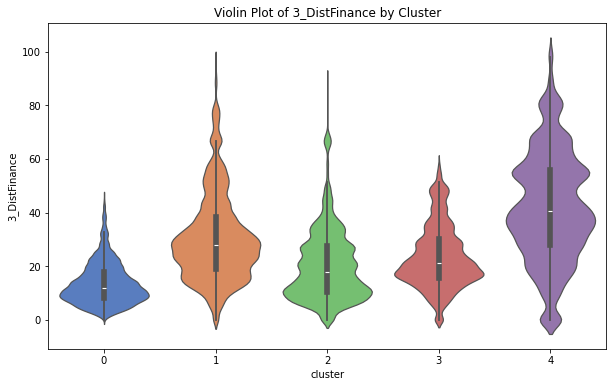

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


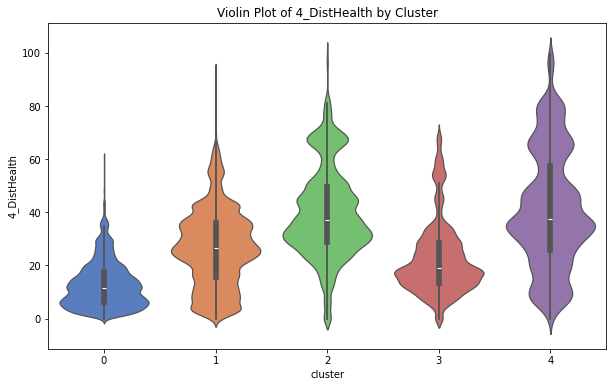

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


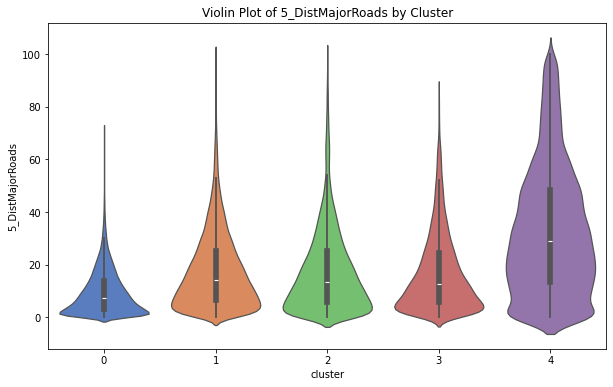

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


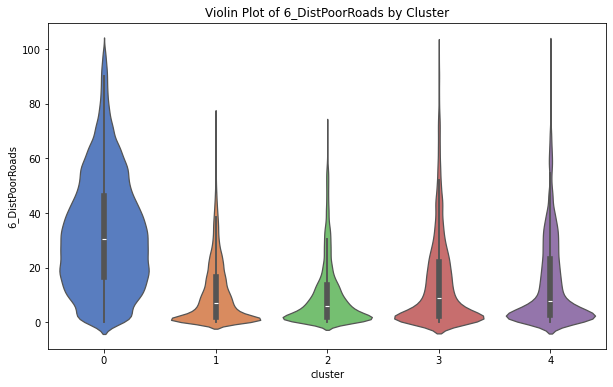

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


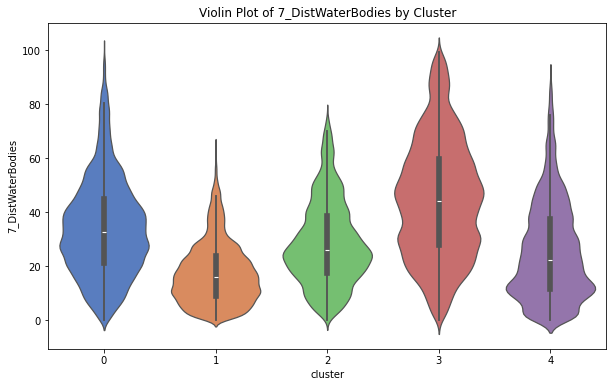

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


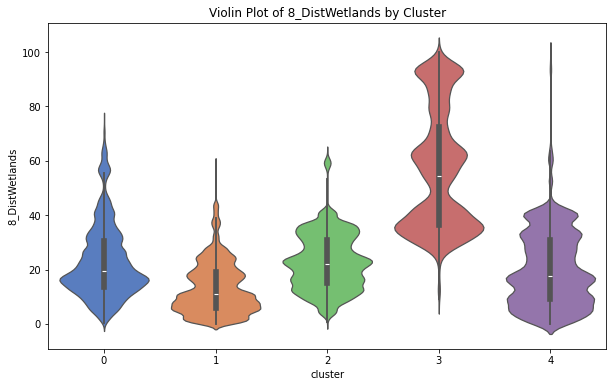

C:\Users\lorra\AppData\Local\Temp\ipykernel_26000\1775917531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y=column, data=data, palette='muted')


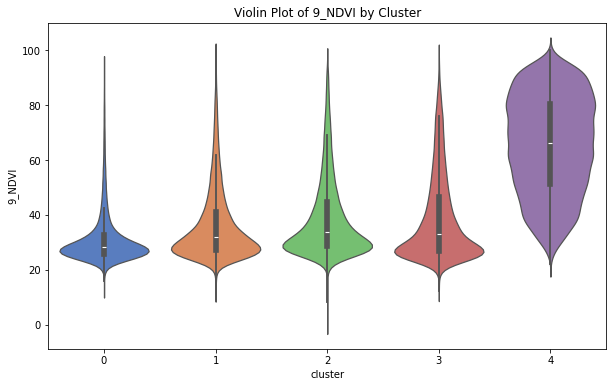

In [9]:
# FEATURE ANALYSIS PER CLUSTER TYPE

# visualize mean feature values with violin plots
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='cluster', y=column, data=data, palette='muted')
    plt.title(f"Violin Plot of {column} by Cluster")
    plt.show()


C:\Users\lorra\AppData\Local\Temp\ipykernel_23116\1007013688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[idx], x='cluster', y=column, data=data, palette='muted')
C:\Users\lorra\AppData\Local\Temp\ipykernel_23116\1007013688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[idx], x='cluster', y=column, data=data, palette='muted')
C:\Users\lorra\AppData\Local\Temp\ipykernel_23116\1007013688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[idx], x='cluster', y=column, data=data, palette='muted')
C

Violin plots saved as Violin_Plots.png


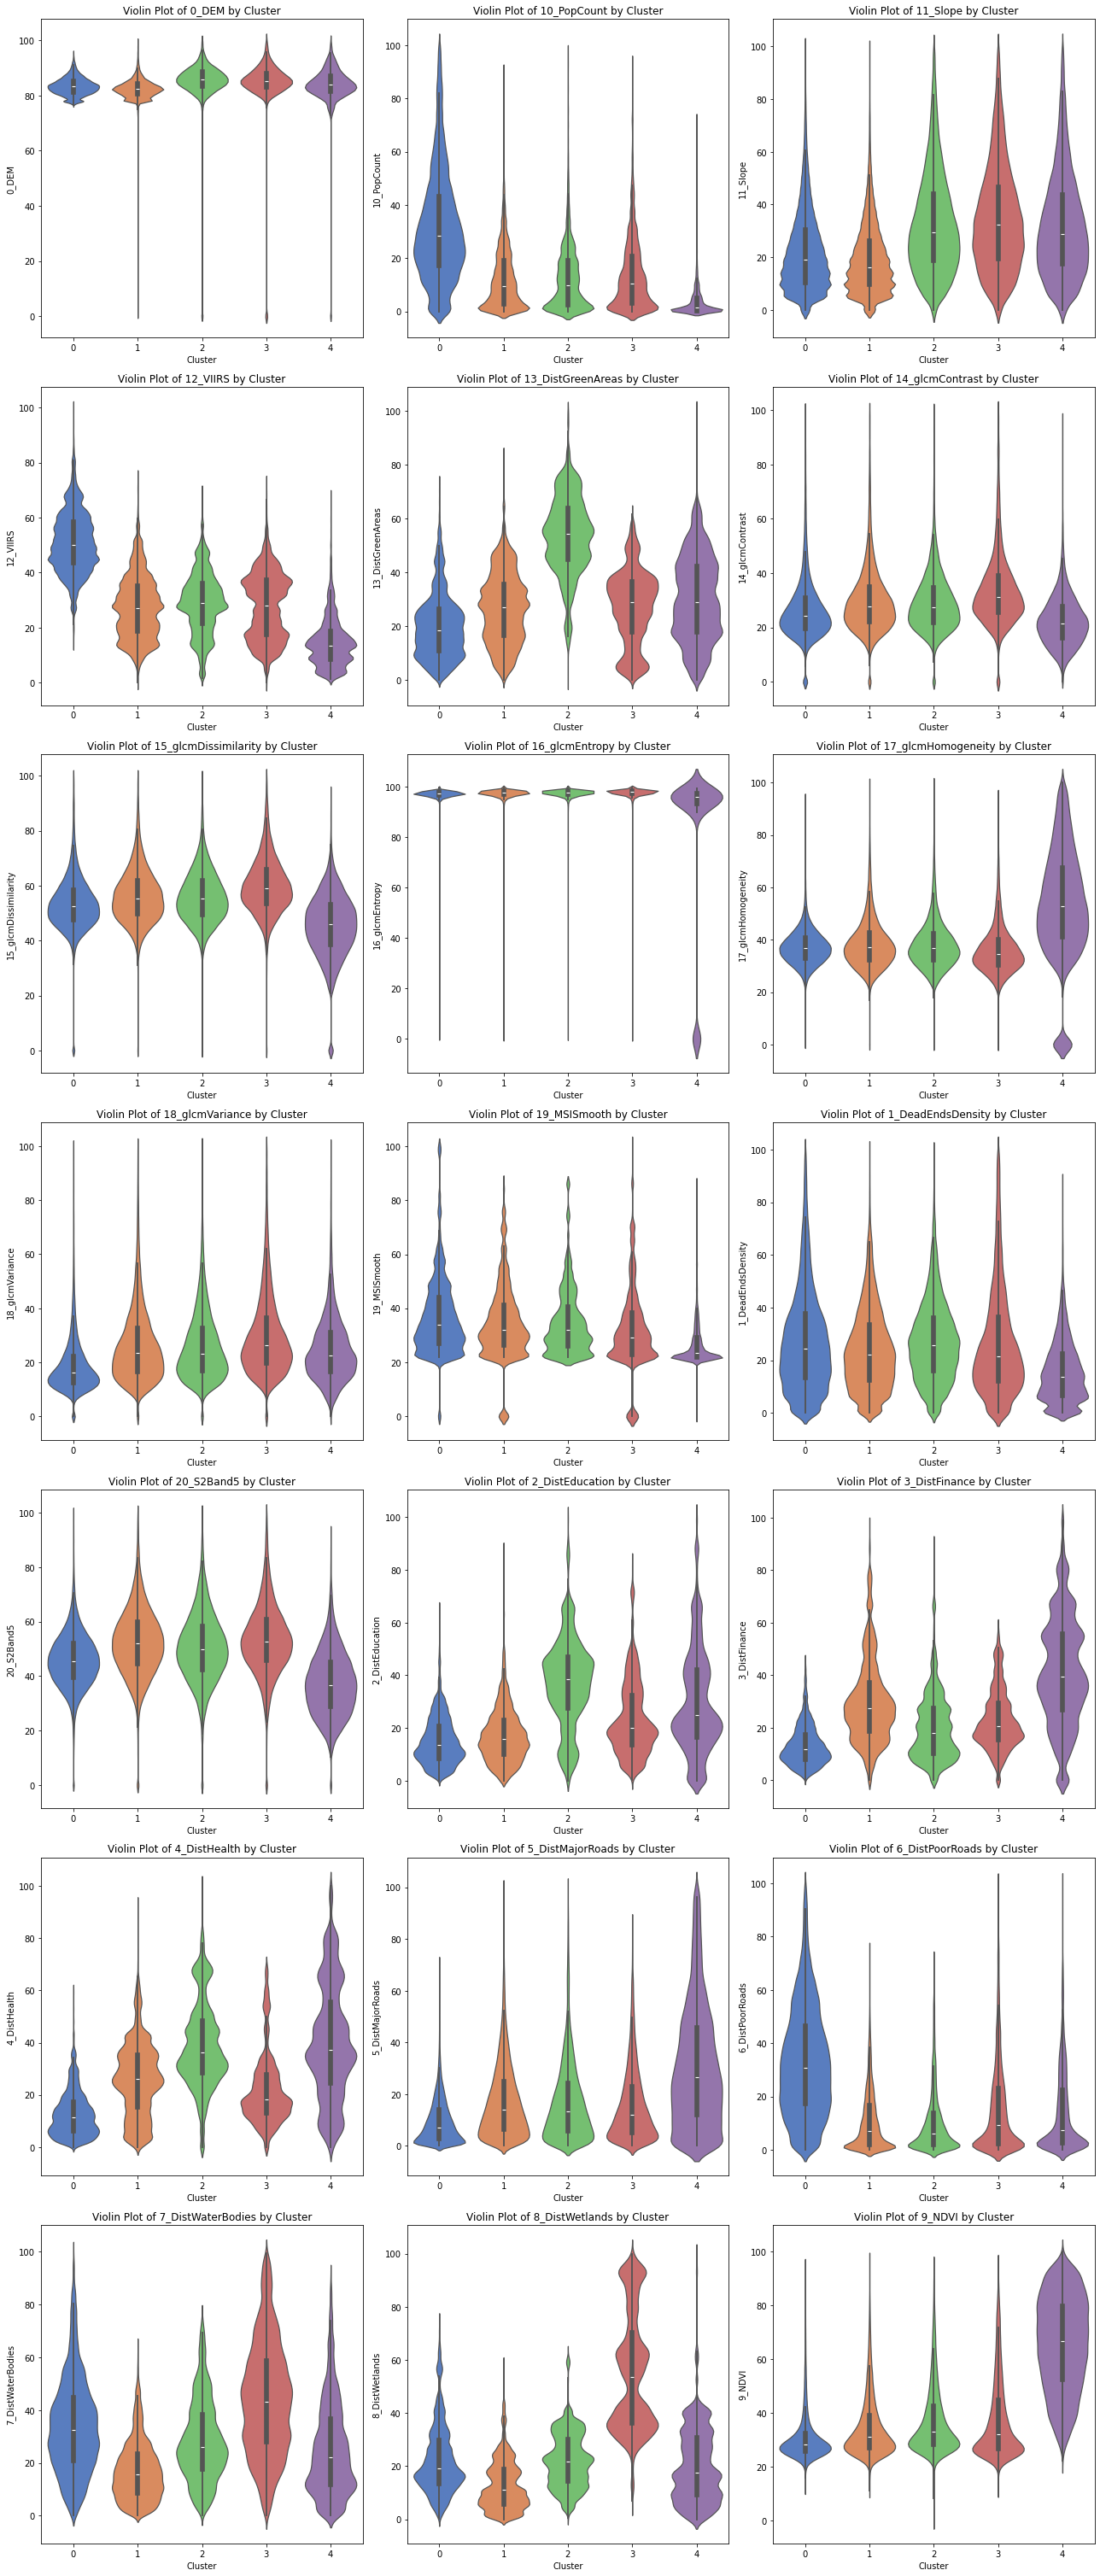

In [15]:
# Define numeric columns (excluding metadata and cluster columns)
numeric_columns = [col for col in data.columns if col not in ['system:index', 'cluster', '.geo']]

# Set up a grid for side-by-side plots
num_features = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()  # Flatten axes for easy iteration

# Create violin plots for each feature
for idx, column in enumerate(numeric_columns):
    sns.violinplot(ax=axes[idx], x='cluster', y=column, data=data, palette='muted')
    axes[idx].set_title(f'Violin Plot of {column} by Cluster')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(column)

# Turn off any unused subplots
for idx in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[idx])

# Save the entire figure as an image BEFORE plt.show()
output_file = "Violin_Plots.png"  # Update with desired file name
plt.tight_layout()
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # Save with high resolution
print(f"Violin plots saved as {output_file}")

# Display the plots
plt.show()


In [14]:
# Save the entire figure as an image
output_file = "Violin_Plots.png"  # Update with desired file name
plt.tight_layout()
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()

print(f"Violin plots saved as {output_file}")

<Figure size 432x288 with 0 Axes>

Violin plots saved as Violin_Plots.png


In [17]:
!pip install scipy

from scipy.stats import f_oneway


In [20]:
# run some statistical validation

features = ['10_PopCount', '12_VIIRS', '13_DistGreenAreas', '9_NDVI']
for feature in features:
    anova_result = f_oneway(*(data[data['cluster'] == cluster][feature] for cluster in range(4)))
    print(f"ANOVA for {feature}: p-value = {anova_result.pvalue}")


ANOVA for 10_PopCount: p-value = 0.0
ANOVA for 12_VIIRS: p-value = 0.0
ANOVA for 13_DistGreenAreas: p-value = 0.0
ANOVA for 9_NDVI: p-value = 0.0


In [21]:
# import the library
from scipy.stats import f_oneway

# Select numeric features (excluding metadata and non-numeric columns)
numeric_features = [col for col in data.columns if col not in ['system:index', '.geo', 'cluster']]

# Dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA for each feature
for feature in numeric_features:
    anova_result = f_oneway(*(data[data['cluster'] == cluster][feature] for cluster in data['cluster'].unique()))
    anova_results[feature] = anova_result.pvalue

# Display the results
for feature, p_value in anova_results.items():
    print(f"ANOVA for {feature}: p-value = {p_value}")


ANOVA for 0_DEM: p-value = 0.0
ANOVA for 10_PopCount: p-value = 0.0
ANOVA for 11_Slope: p-value = 0.0
ANOVA for 12_VIIRS: p-value = 0.0
ANOVA for 13_DistGreenAreas: p-value = 0.0
ANOVA for 14_glcmContrast: p-value = 0.0
ANOVA for 15_glcmDissimilarity: p-value = 0.0
ANOVA for 16_glcmEntropy: p-value = 0.0
ANOVA for 17_glcmHomogeneity: p-value = 0.0
ANOVA for 18_glcmVariance: p-value = 0.0
ANOVA for 19_MSISmooth: p-value = 0.0
ANOVA for 1_DeadEndsDensity: p-value = 0.0
ANOVA for 20_S2Band5: p-value = 0.0
ANOVA for 2_DistEducation: p-value = 0.0
ANOVA for 3_DistFinance: p-value = 0.0
ANOVA for 4_DistHealth: p-value = 0.0
ANOVA for 5_DistMajorRoads: p-value = 0.0
ANOVA for 6_DistPoorRoads: p-value = 0.0
ANOVA for 7_DistWaterBodies: p-value = 0.0
ANOVA for 8_DistWetlands: p-value = 0.0
ANOVA for 9_NDVI: p-value = 0.0
